<a href="https://colab.research.google.com/github/slupok/slupok.github.io/blob/master/first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
# задача с конкурса Tinkoff: https://boosters.pro/championship/tinkoff1/overview
#Датасет содержит данные о кредитах на покупку электроники, которые были одобрены Tinkoff.ru. 
# Необходимо предсказать, выберет ли покупатель кредит от Tinkoff.ru
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [184]:
data = pd.read_csv('/content/Car_sales.csv', sep=',')

In [185]:
data.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [186]:
#проверяем типы данных и заполненность столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [187]:
#удаляем столбец с номером клиента (так как он незначимый) 
# и с регионом проживания (так как он нуждается в серьезной предобработке)
data.drop(['__year_resale_value', 'Price_in_thousands', 'Wheelbase', 'Curb_weight', 'Latest_Launch', 'Power_perf_factor'], axis=1, inplace=True)

In [188]:
# анализируем зависимую переменную: какие значения она принимает и сколько раз
data['Vehicle_type'].value_counts(dropna=False)

Passenger    116
Car           41
Name: Vehicle_type, dtype: int64

In [189]:
# дозаполняем числовые столбцы с пропусками медианными значениями
data['Engine_size'].fillna(data['Engine_size'].median(), inplace=True)
data['Horsepower'].fillna(data['Horsepower'].median(), inplace=True)
data['Width'].fillna(data['Width'].median(), inplace=True)
data['Length'].fillna(data['Length'].median(), inplace=True)
data['Fuel_capacity'].fillna(data['Fuel_capacity'].median(), inplace=True)
data['Fuel_efficiency'].fillna(data['Fuel_efficiency'].median(), inplace=True)

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        157 non-null    object 
 1   Model               157 non-null    object 
 2   Sales_in_thousands  157 non-null    float64
 3   Vehicle_type        157 non-null    object 
 4   Engine_size         157 non-null    float64
 5   Horsepower          157 non-null    float64
 6   Width               157 non-null    float64
 7   Length              157 non-null    float64
 8   Fuel_capacity       157 non-null    float64
 9   Fuel_efficiency     157 non-null    float64
dtypes: float64(7), object(3)
memory usage: 12.4+ KB


In [191]:
# кодируем зависимую переменную(тип транспорта) методом факторизации
# кодируем пол методом факторизации
data['Vehicle_type'] = pd.factorize(data['Vehicle_type'])[0]

In [192]:
# кодируем нечисловые столбцы методом дамми-кодирования
data = pd.concat([data, 
                      pd.get_dummies(data['Manufacturer'], prefix="Manufacturer"),
                      pd.get_dummies(data['Model'], prefix="Model")],
                     axis=1)

In [193]:
#удаляем старые нечисловые столбцы, вместо них уже появились новые числовые
data.drop(['Manufacturer','Model'], axis=1, inplace=True)

In [194]:
data.head()

,Sales_in_thousands,Vehicle_type,Engine_size,Horsepower,Width,Length,Fuel_capacity,Fuel_efficiency,Manufacturer_Acura,Manufacturer_Audi,...,Model_Town & Country,Model_Town car,Model_V40,Model_V70,Model_Villager,Model_Viper,Model_Voyager,Model_Windstar,Model_Wrangler,Model_Xterra
0,16.919,0,1.8,140.0,67.3,172.4,13.2,28.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,39.384,0,3.2,225.0,70.3,192.9,17.2,25.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14.114,0,3.2,225.0,70.6,192.0,17.2,26.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,8.588,0,3.5,210.0,71.4,196.6,18.0,22.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,20.397,0,1.8,150.0,68.2,178.0,16.4,27.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [195]:
# указываем входы и выход модели
y = data['Vehicle_type']
X = data.drop(('Vehicle_type'), axis=1) 

In [196]:
from sklearn.model_selection import train_test_split
# Разбиение набора данных на обучающую и тестовую части в соотношении 3:1.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [197]:
#попробуем использовать градиентный бустинг, реализованный в библиотеке sklearn
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators = 150,  max_depth=5,  random_state=21)
gbt.fit(X_train, y_train)
gbt.score(X_test, y_test)

0.925

In [198]:
y_pred = gbt.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9866666666666667

In [199]:
# немного переберем и здесь параметры 
from sklearn.model_selection import GridSearchCV
param_grid=[ {'n_estimators': [20, 30, 50], 'max_depth': [5, 10,15]},]
gbt1 = ensemble.GradientBoostingClassifier(random_state=21)
grid_search= GridSearchCV(gbt1,param_grid, cv=3)
grid_search.fit(X_train, y_train)
grid_search.score(X_test, y_test)

0.9

In [200]:
grid_search.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [201]:
y_pred = grid_search.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.9383333333333334

In [202]:
y_test.value_counts(dropna=False)

0    30
1    10
Name: Vehicle_type, dtype: int64

In [203]:
from sklearn.metrics import confusion_matrix
y_pred = gbt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[28,  2],
       [ 1,  9]])

In [204]:
import xgboost as xgb

In [205]:
from xgboost import XGBClassifier
cl = XGBClassifier(n_estimators = 150, max_depth = 5, random_state=21)
cl.fit(X_train,y_train)
cl.score(X_test, y_test)

0.975

In [206]:
y_pred = cl.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[30,  0],
       [ 1,  9]])

In [207]:
y_pred = cl.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.9933333333333334

In [208]:
from sklearn.metrics import precision_score
y_pred = cl.predict(X_test)
precision_score(y_test, y_pred)

1.0

In [209]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9

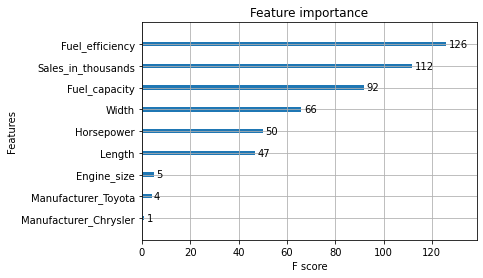

In [210]:
ax = xgb.plot_importance(cl)

In [211]:
confusion_matrix(y_test, y_pred)

array([[30,  0],
       [ 1,  9]])